<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day3_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

보스턴 주택 가격 데이터셋 다운로드


In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)


57344/57026 [==============================] - 0s 0us/step


데이터 형태 확인하기


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(404, 13) (404,)
(102, 13) (102,)


데이터 전처리 및 검증 데이터셋 만들기


In [ ]:
import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.33, 
                                                  random_state = 777)


모델 구성하기


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 구성하기
model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(1)) # 하나의 값을 출력합니다. --> 기본 활성화 함수 : linear

# 모델 설정하기
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae', 'mse']) 
# MAE(Mean Absolute Error) : 평균 절대 오차
# MSE(Mean Squared Error) : 평균 제곱 오차 


모델 학습하기


In [ ]:
history = model.fit(x_train, y_train, 
                    epochs = 300, 
                    validation_data = (x_val, y_val))


Epoch 1/300
9/9 [==============================] - 0s 25ms/step - loss: 545.7006 - mae: 21.7158 - mse: 545.7006 - val_loss: 598.3100 - val_mae: 22.2575 - val_mse: 598.3100
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 524.9111 - mae: 21.2417 - mse: 524.9111 - val_loss: 576.3468 - val_mae: 21.7751 - val_mse: 576.3468
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 503.0701 - mae: 20.7398 - mse: 503.0701 - val_loss: 550.0667 - val_mae: 21.2020 - val_mse: 550.0667
Epoch 4/300
9/9 [==============================] - 0s 8ms/step - loss: 476.2647 - mae: 20.1176 - mse: 476.2647 - val_loss: 517.2952 - val_mae: 20.4658 - val_mse: 517.2952
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 442.7965 - mae: 19.3165 - mse: 442.7965 - val_loss: 478.1359 - val_mae: 19.5358 - val_mse: 478.1359
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 404.3739 - mae: 18.3383 - mse: 404.3739 - val_loss: 430.3519 - val_mae: 1

In [ ]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 9.9142 - mae: 2.2550 - mse: 9.9142


[9.914192199707031, 2.2550082206726074, 9.914192199707031]

모델 결과 그리기

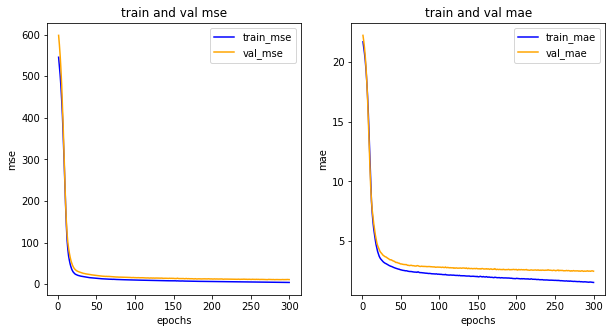

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


모델 예측

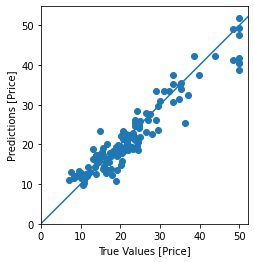

In [ ]:
test_predictions = model.predict(x_val).flatten()

plt.scatter(y_val, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


K-Fold 사용하기


In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
# 여기까진 전부 동일합니다.
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

#----------------------------------------
# K-Fold를 진행해봅니다.
k = 3

# 주어진 데이터셋을 k만큼 등분합니다.
# 여기서는 3이므로 훈련 데이터셋(404개)를 3등분하여
# 1개는 검증셋으로, 나머지 2개는 훈련셋으로 활용합니다.
kfold = KFold(n_splits=k, random_state = 777)

# 재사용을 위해 모델을 반환하는 함수를 정의합니다.
def get_model():
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (13, )))
    model.add(Dense(32, activation = 'relu')) 
    model.add(Dense(1))   

    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    
    return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트를 선언합니다.

# k번 진행합니다.
for train_index, val_index in kfold.split(x_train):
    # 해당 인덱스는 무작위로 생성됩니다.
    # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법입니다.
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # 모델을 불러옵니다.
    model = get_model()
    
    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))
    
    _, test_mae = model.evaluate(x_test, y_test)
    mae_list.append(test_mae)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/300
9/9 [==============================] - 0s 12ms/step - loss: 557.0575 - mae: 21.7697 - val_loss: 526.8380 - val_mae: 21.1230
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 527.3962 - mae: 21.0773 - val_loss: 497.7162 - val_mae: 20.4136
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 493.6023 - mae: 20.2866 - val_loss: 463.5566 - val_mae: 19.5599
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 453.9576 - mae: 19.3188 - val_loss: 421.1755 - val_mae: 18.4713
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 404.5672 - mae: 18.0825 - val_loss: 369.7761 - val_mae: 17.0948
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 346.3294 - mae: 16.5695 - val_loss: 309.4514 - val_mae: 15.3812
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 281.2171 - mae: 14.6716 - val_loss: 243.8058 - val_mae: 13.3857
Epoch 8/300
9/9 [==============================] - 0s 

K-Fold 결과 확인하기

In [ ]:
print(mae_list)
print(np.mean(mae_list))


[2.174060821533203, 2.022883176803589, 2.1328110694885254]
2.1099183559417725
